#  project is identify hand written digits recognition.


INTRODUCTION: In this project 1797 images are loaded and will predict which image is what digit.For example                 image is written as 100 then our trained model will predict that the given image is 100. 
               

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [81]:
digits=load_digits()
print(digits.keys()) #our dataset is made upto 1797 8x8 image

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [82]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [83]:
print(len(digits.data))

1797


In [84]:
digits.data[0] #image is represented by 1d array, we took first image out of 1797.This is numeric data

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

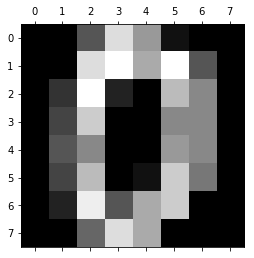

In [85]:
#to see real image
plt.gray()
plt.matshow(digits.images[0])

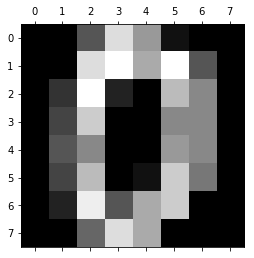

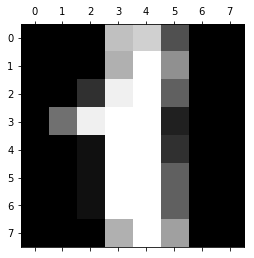

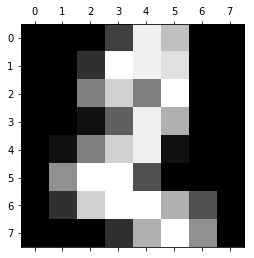

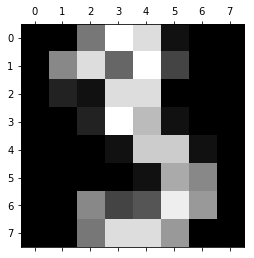

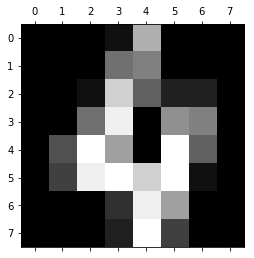

In [86]:
#To see first 5 image
for i in range(5):
    plt.gray()
    plt.matshow(digits.images[i])

In [87]:
digits.target[0:5] #this is target means first is 0 2nd is 1 and so on. Data is features and Target is labels

array([0, 1, 2, 3, 4])

## Split data into training and testing data

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [89]:
len(x_train)

1437

In [90]:
#CREATINF LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [91]:
Logistic_reg=LogisticRegression()
Logistic_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
#SAY HOW ACCURATE IS OUR CREATED MODEL
Logistic_reg.score(x_test,y_test)

0.98055555555555551

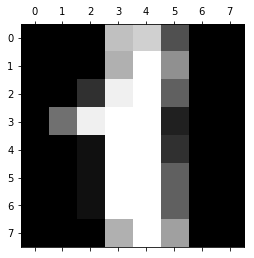

In [93]:
plt.matshow(digits.images[1])

In [94]:
Logistic_reg.predict([digits.data[1]])

array([1])

In [95]:
Logistic_reg.predict([digits.data[10]])

array([0])

In [96]:
Logistic_reg.predict([digits.data[67]])

array([6])

## Now we have seen that our model is 96% accurate so how to know where our data is not working, so to know that we have confusion matrix

In [97]:
y_predicted=Logistic_reg.predict(x_test)
from sklearn.metrics import confusion_matrix

In [98]:
cm=confusion_matrix(y_test,y_predicted)

In [99]:
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 36]], dtype=int64)

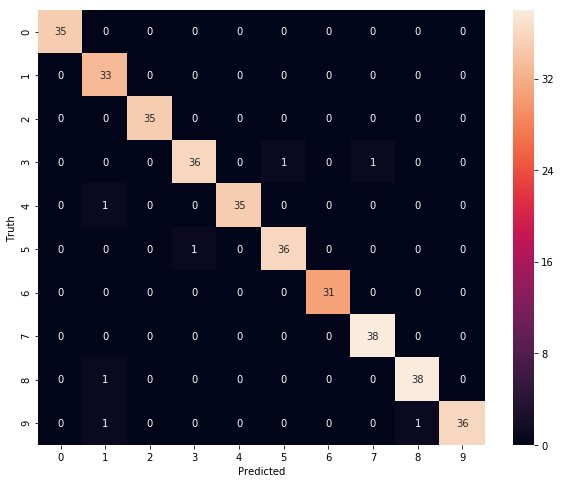

In [100]:
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# non zero means our model is not working right
for example 37 times our model was truth 0 and predicted also 0,
32 times our model was 9 and predicted also 9,
 2 times our model was 9 but it predicted 8 so here model does not work